# Data Exploration and Visualization
Author: Alikhan Semembayev

## 0. Get dataset

In [25]:
import pandas as pd

# Load dataset
df = pd.read_csv('../../../../data/text/combined_cleaned.csv')
df = df.dropna(how='any')

## 1. Remove punctuation and stop words in the data files. (10 points)

In [21]:
from autocorrect import Speller
from collections import defaultdict
from nltk import pos_tag, WordNetLemmatizer
import nltk
import re
import string
import demoji
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
spell = Speller()

# Function to clean text
def clean_text(text):
    # Tokenize and remove stopwords and punctuation
    text = ' '.join([word.lower() for word in text.split() if word.isalnum() and word.lower() not in stop_words])
    return text

def clean_text_plus(text):
    # Replace emojis
    text = demoji.replace(text)
    
    # Lowercase text
    text = text.lower()

    # Remove stop words and non-alphanumeric tokens
    words = ['not' if word == 't' else spell(word) for word in word_tokenize(text) 
             if word.isalnum() and word not in stop_words or word in ['not', 'no', 't']]

    # POS tagging and Lemmatization
    tagged_words = pos_tag(words)
    
    tag_map = defaultdict(lambda: "n")
    tag_map["N"] = "n"
    tag_map["V"] = "v"
    tag_map["J"] = "a"
    tag_map["R"] = "r"
    
    words = [lemmatizer.lemmatize(word, pos=tag_map[tag[0]]) for word, tag in tagged_words]

    # Return cleaned words as a single string
    return ' '.join(words)

In [26]:
# Apply the function to dataset
df['cleaned_text'] = df['text'].apply(clean_text)
# df['cleaned_text'] = df['text'].apply(clean_text_plus)

## 2. Print out the 20 most common words in the frequency distribution.  (10 points)

In [ ]:
nltk.download('punkt')

In [27]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize the cleaned text and get a frequency distribution
all_words = ' '.join(df['cleaned_text']).lower()
word_tokens = word_tokenize(all_words)

# Get the 20 most common words
common_words = Counter(word_tokens).most_common(20)
print(common_words)

with open('common_words.txt', 'w') as f:
    for word, count in common_words:
        f.write(f'{word}: {count}\n')

[('like', 19657), ('know', 18800), ('think', 14540), ('would', 13019), ('get', 12227), ('good', 10463), ('make', 10341), ('one', 10045), ('go', 9172), ('feel', 7712), ('yes', 7682), ('time', 7499), ('well', 7483), ('really', 7237), ('see', 7218), ('people', 7062), ('yeah', 6914), ('use', 6629), ('day', 6611), ('love', 6217)]


## 3. Plot the frequency distribution in three different ways and explain which one is most effective.  (40 points)

In my opinion, the first and second options are good. Bar chat is great for use in a report and article, but it will also do its job well in presentations. However, a word cloud will show such information more colorfully in a presentation. This type of data presentation is most suitable for presentation. Although a pie chart is also great for presenting such information, in this case we have too many labels.

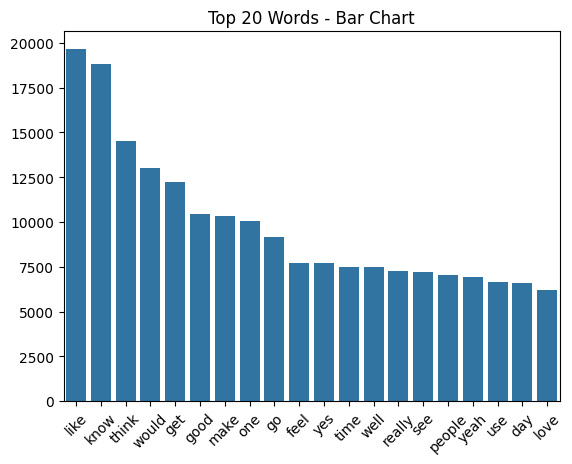

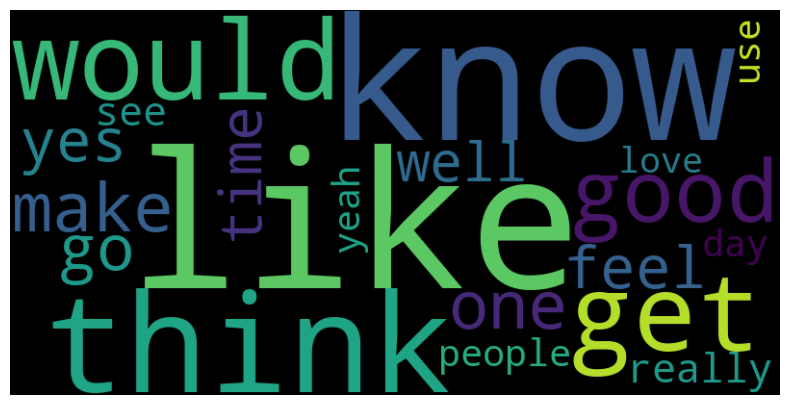

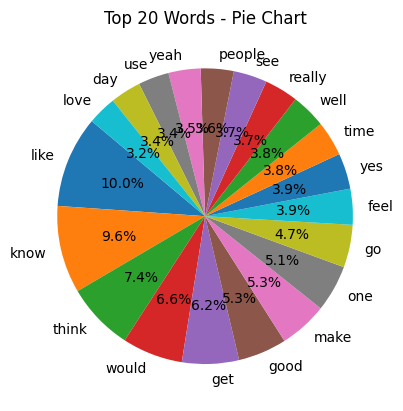

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Plot 1: Bar chart
words, counts = zip(*common_words)
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 20 Words - Bar Chart')
plt.xticks(rotation=45)
plt.savefig('bar_chart.png')
plt.show()

# Plot 2: Word Cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(common_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()

# Plot 3: Pie chart
plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140)
plt.title('Top 20 Words - Pie Chart')
plt.savefig('pie_chart.png')
plt.show() 

## 4. Count and display the most common 20 bigrams in your data.  (10 points)

In [29]:
from nltk import bigrams

# Get bigrams from the tokenized words
bigram_tokens = list(bigrams(word_tokens))

# Get the 20 most common bigrams
common_bigrams = Counter(bigram_tokens).most_common(20)
print(common_bigrams)

with open('common_bigrams.txt', 'w') as f:
    for bigram, count in common_bigrams:
        f.write(f'{bigram}: {count}\n')

[(('nice', 'chat'), 1472), (('feel', 'like'), 1192), (('white', 'house'), 1157), (('seem', 'like'), 1095), (('sound', 'like'), 889), (('great', 'chat'), 875), (('high', 'school'), 849), (('make', 'sense'), 847), (('think', 'would'), 728), (('would', 'like'), 678), (('never', 'know'), 623), (('year', 'old'), 617), (('year', 'ago'), 605), (('good', 'day'), 595), (('long', 'time'), 578), (('would', 'think'), 569), (('video', 'game'), 559), (('look', 'like'), 555), (('good', 'one'), 550), (('great', 'day'), 527)]


In [30]:
print(set(stopwords.words('english')))

{'himself', "haven't", 'by', 'then', 'than', 'some', 'which', 'as', 'most', 'couldn', 'him', 'his', 'wouldn', 'ours', 'above', 'in', 'wasn', 'hers', 'hadn', "didn't", 'here', 'mightn', 'each', 'were', 'and', 'between', 'isn', 'myself', 'too', 'few', 'their', 'yourself', "you've", 'those', 'ma', 'd', 'if', 'at', 'after', 'for', 'off', 'herself', 'can', 'won', 'from', 'shan', 'more', 'doing', "that'll", 'no', 'you', 'mustn', 'it', 'she', "hadn't", 'what', 'just', 'my', 'had', 'until', 'when', 've', 'of', 'through', 'yourselves', "aren't", 'we', 'this', 'or', 'why', 'into', "won't", 'there', 'm', 'are', 'am', 'weren', 'needn', 'its', 'with', "mustn't", 'haven', 'been', 'has', "doesn't", "needn't", 'her', 'during', 'all', 'shouldn', 'such', 's', 'be', 'a', 'they', 'itself', "hasn't", 'how', 'hasn', 'but', 'should', 'before', 'that', "weren't", 'will', 'y', 'other', 'the', 'once', 'he', 'out', "mightn't", 'theirs', 'o', 'do', 'our', 're', 'them', 'an', 'yours', "it's", 'down', "you'd", 'ain

## 5. Propose and implement an effective way to measure the similarities among documents/records that exist in your data.  (30 points)

Since the dataset labels already represent the similarities of individual records very well, I decided to determine the polarity of the text. I made 2 lists of keywords: positive and negative. Then I counted the number of records in which a word from one list or another occurs.

In [46]:
positive_keywords = [
    "happy", "joy", "love", "excellent", "great", "fantastic", "amazing", "wonderful", 
    "awesome", "positive", "success", "brilliant", "beautiful", "delight", "pleasure", 
    "satisfied", "fortunate", "hopeful", "grateful", "blessed", "excited", "cheerful", 
    "friendly", "supportive", "optimistic", "peaceful", "victory", "trust", "incredible", 
    "magnificent"
]
pos = 0

negative_keywords = [
    "sad", "angry", "frustrated", "terrible", "bad", "awful", "horrible", "hate", 
    "failure", "disappointed", "unhappy", "miserable", "pain", "fear", "anxiety", 
    "disaster", "negative", "worse", "tragic", "depressed", "upset", "hopeless", 
    "annoyed", "despair", "irritated", "criticize", "jealous", "hurt", "stressed", 
    "confused"
]
neg = 0

for row in df.values:
    for word in row[2].split():
        if word in positive_keywords:
            pos = pos+1
        elif word in negative_keywords:
            neg = neg+1


18680 8839


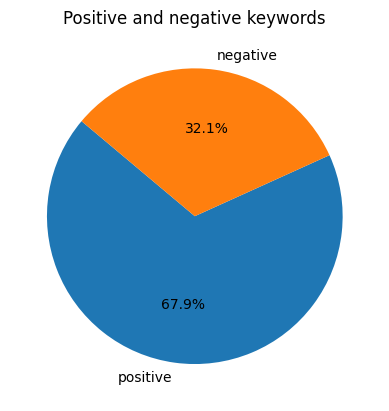

In [49]:
plt.pie([pos, neg], labels=["positive", "negative"], autopct='%1.1f%%', startangle=140)
plt.title('Positive and negative keywords')
plt.savefig('positive_negative_chart.png')
plt.show()